# Lab 6 Loshak Viktor IP-11
## Task:
1. Given the titanic.csv data, build a model that can determine whether a passenger will survive by filling in the remaining parameters. Use several methods. Compare the results.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('titanic.csv', index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
missing_percentages = data.isna().mean() * 100
print(missing_percentages)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


Preparing data for inputting into models.

In [5]:
prep_data = data.dropna(subset=['Age', 'Embarked'])
prep_data = prep_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

# Convert categorical variables to numerical
prep_data['Sex'] = prep_data['Sex'].map({'male': 0, 'female': 1})
prep_data['Embarked'] = prep_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

prep_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0
2,1,1,38.0,1,0,71.2833,1,1
3,3,1,26.0,0,0,7.9250,0,1
4,1,1,35.0,1,0,53.1000,0,1
5,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,3,1,39.0,0,5,29.1250,2,0
887,2,0,27.0,0,0,13.0000,0,0
888,1,1,19.0,0,0,30.0000,0,1


Splitting data into training and test set.

In [6]:
X = prep_data.drop('Survived', axis=1)
y = prep_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
ramdom_forest = RandomForestClassifier()

logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
ramdom_forest.fit(X_train, y_train)

logreg_pred = logistic_regression.predict(X_test)
dt_pred = decision_tree.predict(X_test)
rf_pred = ramdom_forest.predict(X_test)

Let's estimate the performance of our models using f1 score and the accuracy measurement.

In [20]:
logreg_f1 = classification_report(y_test, logreg_pred)
dt_f1 = classification_report(y_test, dt_pred)
rf_f1 = classification_report(y_test, rf_pred)

print('Evaluation for logistic regression:\n', logreg_f1)
print('Evaluation for decision tree:\n',dt_f1)
print('Evaluation for random forest:\n',rf_f1)

Evaluation for logistic regression:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143

Evaluation for decision tree:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        80
           1       0.68      0.62      0.65        63

    accuracy                           0.71       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.70      0.71      0.70       143

Evaluation for random forest:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80        80
           1       0.75      0.71      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      

Let's plot the ROC curves to evaluate the performance more visually

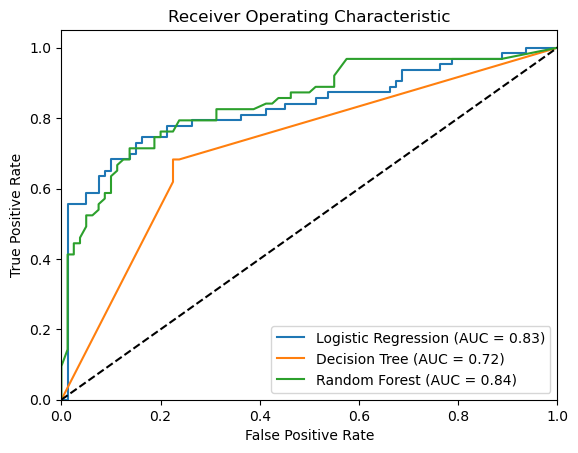

In [21]:
logreg_probs = logistic_regression.predict_proba(X_test)[:, 1]
dt_probs = decision_tree.predict_proba(X_test)[:, 1]
rf_probs = ramdom_forest.predict_proba(X_test)[:, 1]

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

logreg_auc = auc(logreg_fpr, logreg_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure()
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = %0.2f)' % logreg_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %0.2f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
